# Case study 3: Flinders ranges

In [1]:
import folium
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import numpy as np
from shapely.geometry import Polygon
import geopandas
import pandas as pd

In [2]:
map_crs = 'EPSG:4326'
proj_crs = 'EPSG:28354'

In [3]:
existing_extent = (138.362206, -32.463842, 139.262268, -31.999178)
center = (existing_extent[1]+existing_extent[3])/2, (existing_extent[0]+existing_extent[2])/2
minlat = existing_extent[3]
maxlat = existing_extent[1]
minlong = existing_extent[2]
maxlong = existing_extent[0]
lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
mbbox = geopandas.GeoDataFrame(index=[0], crs=map_crs, geometry=[bbox_geom])
example_rect = GeoData(geo_dataframe = mbbox,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},                  
                   name = 'Example')
print(map_crs,mbbox.total_bounds)
mbbox=mbbox.to_crs(proj_crs)
print(proj_crs,mbbox.total_bounds)


EPSG:4326 [138.362206 -32.463842 139.262268 -31.999178]
EPSG:28354 [ 250805.15298565 6405084.32805869  336682.92153939 6458336.08597563]


In [4]:
# center=(-33.5,138.7)



wms_warox = WMSLayer(
    url='http://geo.loop-gis.org/geoserver/GSSA/wms?',
    layers='GSSA:sth_flinders',
    format='image/png',
    transparent=True,
    attribution='Outcrop data from GSSA',
    name='outcrops'

)
wms_geol = WMSLayer(
    url='http://geo.loop-gis.org/geoserver/GSSA/wms?',
    layers='GSSA:2m surface geology',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSSA',
    name='geology'

)
m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
m.add_layer(wms_warox)
# if(not test_data_name =='Draw Your Own'):
#     m.add_layer(example_rect)


m.add_control(LayersControl())
dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m.add_layer(example_rect)
m

Label(value='')

Map(center=[-32.23151, 138.81223699999998], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

In [5]:
from geopandas import GeoDataFrame
from shapely.geometry import shape 
draw = dc.last_draw
try:
    poly = shape(draw['geometry'])
    poly_gdf = GeoDataFrame([1], geometry=[poly], crs=map_crs)
    bbox_gdf = poly_gdf.to_crs(proj_crs)
    bbox_3d = {"minx": np.min(bbox_gdf.loc[:,'geometry'][0].exterior.xy[0]),
         "miny": np.min(bbox_gdf.loc[:,'geometry'][0].exterior.xy[1]),
         "maxx": np.max(bbox_gdf.loc[:,'geometry'][0].exterior.xy[0]),
         "maxy": np.max(bbox_gdf.loc[:,'geometry'][0].exterior.xy[1]),
         "base": -3200,
         "top": 1200,}
except:
    minx = mbbox.total_bounds[0]
    maxx = mbbox.total_bounds[2]
    miny = mbbox.total_bounds[1]
    maxy = mbbox.total_bounds[3]# [ 274934.13200956 6297758.41393543  323980.90024616 6329307.64682912]
    bbox_3d = {'minx': minx,
     'miny': miny,
     'maxx': maxx,
     'maxy': maxy,
     'base': -3200,
     'top': 1200}

## Map2Loop


 orientations layer  metadata
--------------------
    bbox [ 251265.92339537 6405219.91312584  336426.97143085 6458322.32358355]
    CRS epsg:28354
    # items 380
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 218644.77872317 6354880.91322556  406152.30668822 6482266.47242361]
    CRS epsg:28354
    # items 84
    Data types ['Polygon']

 fold layer  metadata
--------------------
    empty file, check contents

 fault layer  metadata
--------------------
    bbox [ 251200.08969364 6405084.32805869  300888.60554507 6458336.08597563]
    CRS +init=epsg:28354 +type=crs
    # items 16
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    empty file, check contents

Warnings:
     No extra litho for geology polygons
     No more extra litho for geology polygons
     84 NaN/blank found in column "STRATDESC" of geology file, replacing with 0
     No fold polarity for fold polylines
     No fault dip for fault polylines
     No 

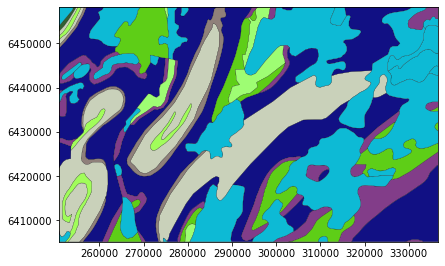

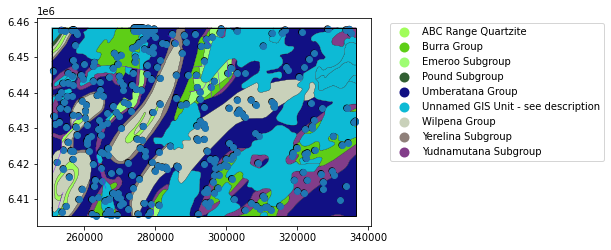

In [13]:
# import os
# import hjson

# from map2loop.project import Project

# %matplotlib inline
# proj = Project( 
#                  structure_file='SA/data/sth_flinders_28354.shp',
#                 fault_file='SA/data/2M Linear Structures_28354.shp',
#                 fold_file='SA/data/2M Linear Structures_28354.shp',
#                 geology_file='SA/data/2M_Surface_Geology_28354_relage.shp',
#                 mindep_file="SA/data/null_mindeps.shp",
#                  metadata='SA/data/meta.hjson',
# #                  state = "SA",
# #                  remote = False,
# #                 clut_path='SA/data/GSSA_2M_colours.csv'
#                  # path to hosted metadata describing the remote sources
# #                  metadata='https://gist.githubusercontent.com/yohanderose/8f843de0dde531f009a3973cbdadcc9f/raw/918f412ae488ce1a6bca188306f7730061ecf551/meta_remote.hjson')                
# )
# proj.update_config(
#                     out_dir='./gmd',
#                     bbox_3d=bbox_3d,
#                     proj_crs={'init': 'EPSG:28354'},
# #                     quiet=True,
#                     overwrite="true",
#                     drift_prefix=['T','Q','water','void']
#                   )
# proj.config.clut_path='https://gist.githubusercontent.com/yohanderose/8f7e2d57db9086fbe1a7c651b9e25996/raw/ac5062e68d251c21bbc24b811ee5b17cc2f98ce3/500kibg_colours.csv'#SA/data/GSSA_2M_colours.csv'

import os
import hjson
import map2loop
map2loop._clut_path='SA/data/GSSA_2M_colours.csv'
from map2loop.project import Project
%matplotlib inline
proj = Project( 
                 structure_file='SA/data/sth_flinders_28354.shp',
                fault_file='SA/data/2M Linear Structures_28354.shp',
                fold_file='SA/data/2M Linear Structures_28354.shp',
                geology_file='SA/data/2M_Surface_Geology_28354_relage.shp',
                mindep_file="SA/data/null_mindeps.shp",
                 metadata='SA/data/meta.hjson',
#                  state = "SA",
#                  remote = False,
#                 clut_path='SA/data/GSSA_2M_colours.csv'
                 # path to hosted metadata describing the remote sources
#                  metadata='https://gist.githubusercontent.com/yohanderose/8f843de0dde531f009a3973cbdadcc9f/raw/918f412ae488ce1a6bca188306f7730061ecf551/meta_remote.hjson')                
)
proj.update_config(
                    out_dir='sa-test',
                    bbox_3d=bbox_3d,
                    proj_crs={'init': 'EPSG:28354'},
#                     quiet=True,
                    overwrite="true",
                    drift_prefix=['T','Q','water','void']
                  )

  0%|          | 0/100 [00:00<?, ?it/s]

Generating topology analyser input...
84  polygons
Successful parameter load
Output directory created at: sa-test/graph
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:Done.
Generating topology graph display and unit groups...
0    'Heysen Supergroup', 'anchor': 'n', 'fontStyle': 'bold'
1    'Unnamed GIS Unit - see description', 'anchor': 'n', 'fontStyle': 'bold'
2    'Warrina Supergroup', 'anchor': 'n', 'fontStyle': 'bold'
3    'Wilpena Group', 'anchor': 'n', 'fontStyle': 'bold'
4    'ABC Range Quartzite'
5    'Burra Group'
6    'Emeroo Subgroup'
7    'Pound Subgroup'
8    'Umberatana Group'
9    'Unnamed GIS Unit - see description'
10    'Wilpena Group'
11    'Yerelina Subgroup'
12    'Yudnamutana Subgroup'
Topology figure saved to sa-test/tmp/topology-fig.png


 10%|█         | 10/100 [00:01<00:14,  6.26it/s]

Done
Fetching DTM...  bbox:138.2487471414877 139.37108898881752 -32.579487181629595 -31.883661960489242
Attempt: 0 dtm geotif saved as sa-test/dtm/dtm.tif
Done.
reprojected dtm geotif saved as sa-test/dtm/dtm_rp.tif


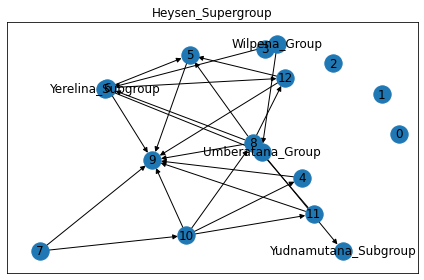

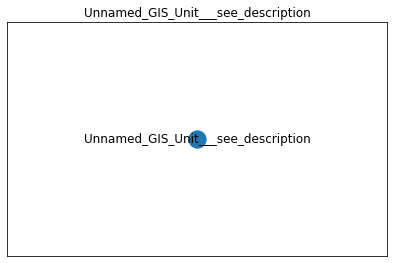

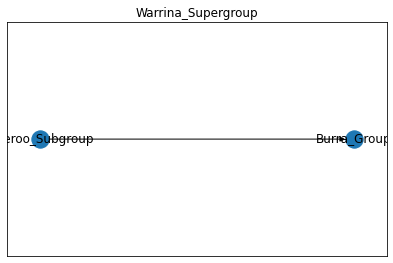

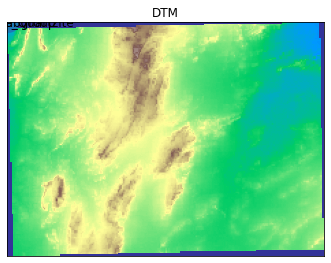

 30%|███       | 30/100 [00:04<00:09,  7.45it/s]

group choices: 1
dtb and dtb_null set to 0
380 orientations saved to sa-test/output/orientations.csv


 50%|█████     | 50/100 [00:05<00:04, 11.17it/s]

extra orientations saved as /empty_series_orientations.csv
basal contacts saved allpts =  2786 deci_pts =  892
saved as sa-test/tmp/all_contacts.csv and sa-test/tmp/contacts.csv
basal contacts without faults saved as sa-test/tmp/basal_contacts.shp
decimated contacts saved as sa-test/output/contacts4.csv


 60%|██████    | 60/100 [00:11<00:10,  3.94it/s]

All observations n= 380
groups ['Warrina Supergroup' 'Heysen Supergroup'
 'Unnamed GIS Unit - see description' 'Wilpena Group'
 'Moralana Supergroup'] 
codes ['Emeroo Subgroup' 'Yudnamutana Subgroup'
 'Unnamed GIS Unit - see description' 'ABC Range Quartzite'
 'Pound Subgroup' 'Wilpena Group' 'Umberatana Group' 'Yerelina Subgroup'
 'Burra Group']


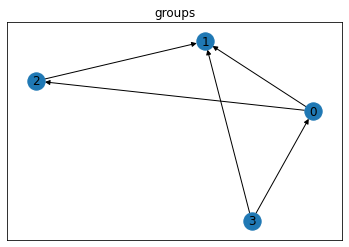

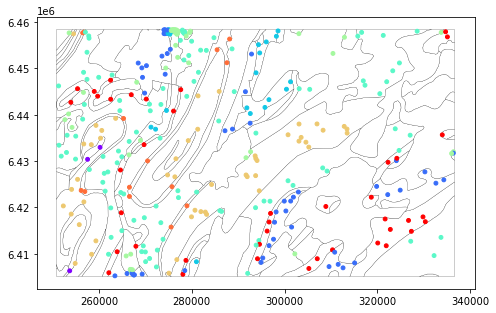

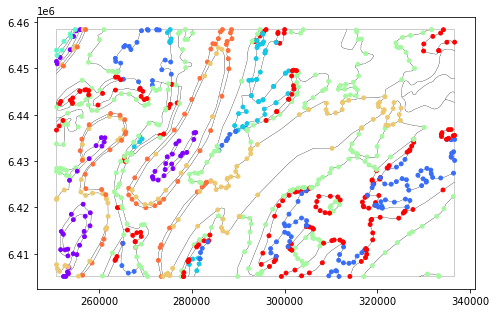

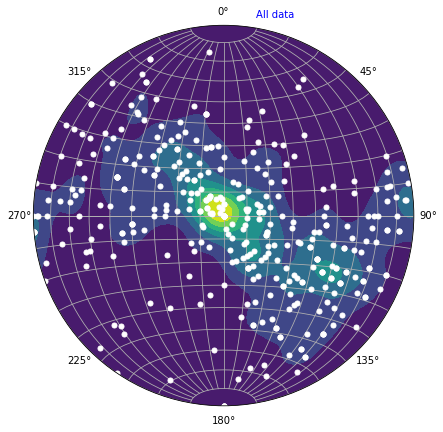

----------------------------------------------------------------------------------------------------------------------
Warrina Supergroup observations n= 102
strike/dip of girdle 269.72659235794447 / 89.24932719291539


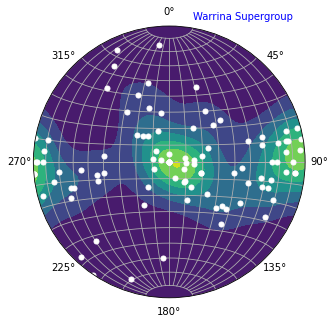

----------------------------------------------------------------------------------------------------------------------
Heysen Supergroup observations n= 218
strike/dip of girdle 124.6564456072315 / 89.70614506898453


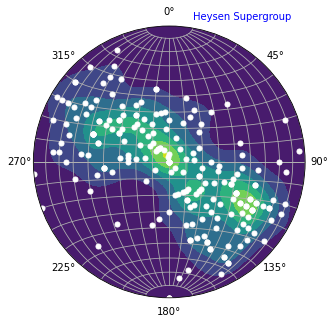

----------------------------------------------------------------------------------------------------------------------
Unnamed GIS Unit - see description observations n= 56
strike/dip of girdle 309.5050902238229 / 86.9949149808441


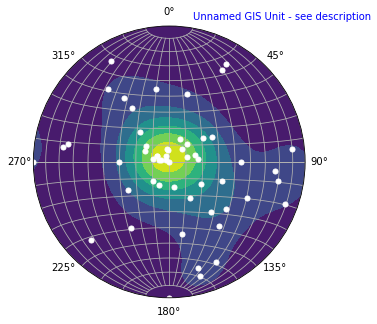

----------------------------------------------------------------------------------------------------------------------
Wilpena Group observations n= 3
strike/dip of girdle 80.7534224822727 / 22.954045730898414


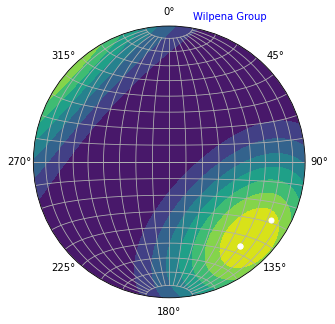

----------------------------------------------------------------------------------------------------------------------
Moralana Supergroup observations has 1 observation
rbf_split 0 18405
['Heysen Supergroup', 'Warrina Supergroup', 'Unnamed GIS Unit - see description', 'Wilpena Group', 'Moralana Supergroup']
172 107
interpolated dips


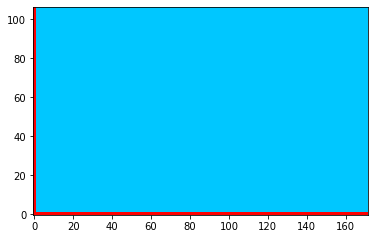

interpolated dip directions


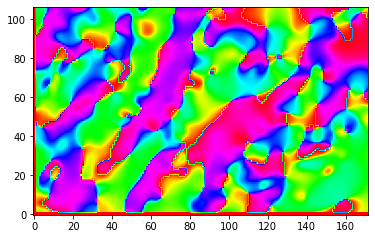

interpolated contacts


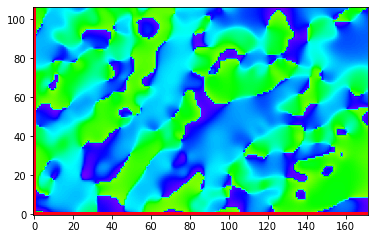

 70%|███████   | 70/100 [00:23<00:15,  1.94it/s]

fault orientations saved as sa-test/output/fault_orientations.csv
fault positions saved as sa-test/output/faults.csv
fault dimensions saved as sa-test/output/fault_dimensions.csv


 90%|█████████ | 90/100 [00:26<00:03,  2.77it/s]

Fault Fault_338 with displacement of 522 capped to 490.7646838061598
fault displacement estimates saved as sa-test/output/fault_displacements3.csv
near-fault orientations saved as sa-test/tmp/ex_f_combo_full.csv
near-fault orientations saved as sa-test/tmp/ex_f_combo_full.csv
0 Wilpena_Group
1 Heysen_Supergroup
2 Warrina_Supergroup
3 Unnamed_GIS_Unit___see_description
pluton contacts and orientations saved as:
sa-test/output/ign_contacts.csv
sa-test/output/ign_orientations_domes.csv
Propagating dips along contacts...
161
551 points saved to sa-test/tmp/raw_contacts.csv
198 thickness estimates saved as sa-test/output/formation_thicknesses.csv
['Yerelina_Subgroup' 'Yudnamutana_Subgroup' 'Emeroo_Subgroup'
 'ABC_Range_Quartzite' 'Wilpena_Group' 'Umberatana_Group'] already processed
62 min thickness estimates appended to sa-test/output/formation_thicknesses.csv
Yerelina_Subgroup 104.0 161.61184533377667
Yudnamutana_Subgroup 178.0 173.28857727114683
Emeroo_Subgroup 167.0 191.3130070504007
AB

100%|██████████| 100/100 [00:43<00:00,  2.31it/s]

cycles []


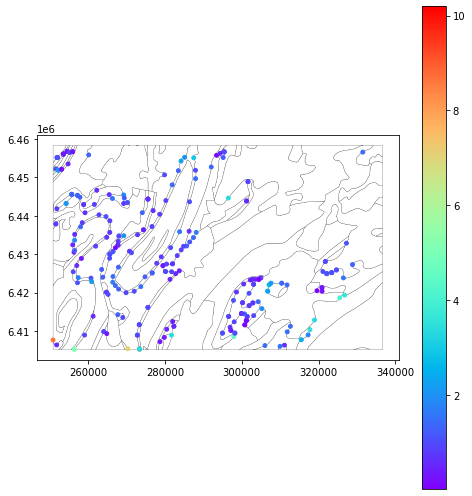

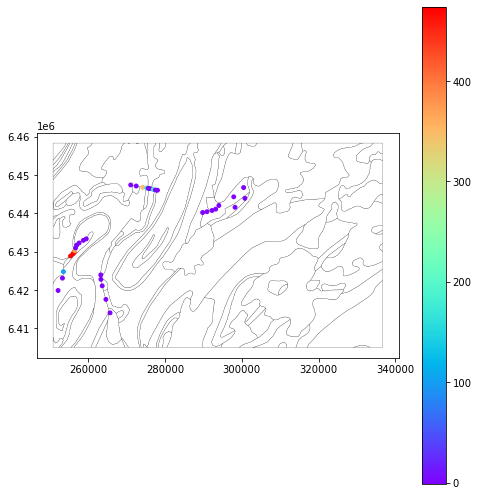

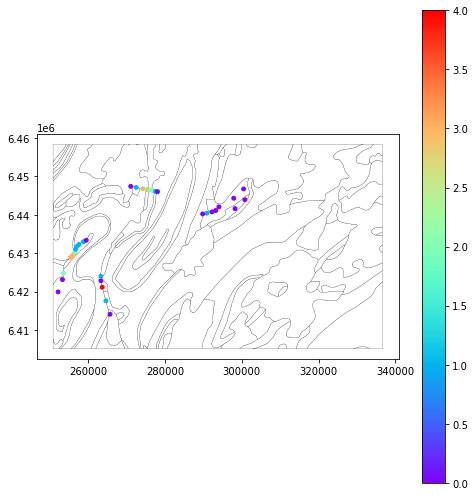

In [14]:
proj.run()

## Loop Structural

In [15]:
# Define project pathing from m2l
proj_path = proj.config.project_path
graph_path = proj.config.graph_path
tmp_path = proj.config.tmp_path
data_path = proj.config.data_path
dtm_path = proj.config.dtm_path
output_path = proj.config.output_path
vtk_path = proj.config.vtk_path

# Define project bounds
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

fault_file = proj.config.fault_file_csv

In [19]:
import random
import os
import time
from datetime import datetime
import shutil
import logging
logging.getLogger().setLevel(logging.INFO)

import numpy as np
from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel

nowtime=datetime.now().isoformat(timespec='minutes')   
model_name='leaflet'+'_'+nowtime.replace(":","-").replace("T","-")
if (os.path.exists(vtk_path+model_name)):
    shutil.rmtree(vtk_path+model_name)
os.mkdir(vtk_path+model_name)
filename=vtk_path+model_name+'/'+'surface_name_{}.vtk'


f=open(tmp_path+'/bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()
t1 = time.time()
fault_params = {'interpolatortype':'FDI',
                'nelements':3e5,
                'fault_buffer':.5,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI', 'FDI', 'surfe'
                    'nelements':3e5,  # how many tetras/voxels
                    'buffer':1.8,  # how much to extend interpolation around box
                    'solver':'pyamg',
                    'damp':True,
                    'cpw':5,
                    'npw':5}

model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=False,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)




Updating geological model. There are: 
22 geological features that need to be interpolated



  0%|          | 0/22 [00:00<?, ?it/s]

Model update took: 708.4239120483398 seconds


In [21]:
view = LavaVuModelViewer(model,vertical_exaggeration=1) 
view.nsteps = np.array([200,200,200])
#view.set_zscale(2)
# view.add_model()
# view.nelements = 3e5#steps=np.array([,50,50])
#view.add_model_surfaces(filename=filename)
view.add_model_surfaces()
view.add_data(model['supergroup_0'])
view.interactive()  

  0%|          | 0/15 [00:00<?, ?it/s]

Adding surfaces took 442.9543423652649 seconds



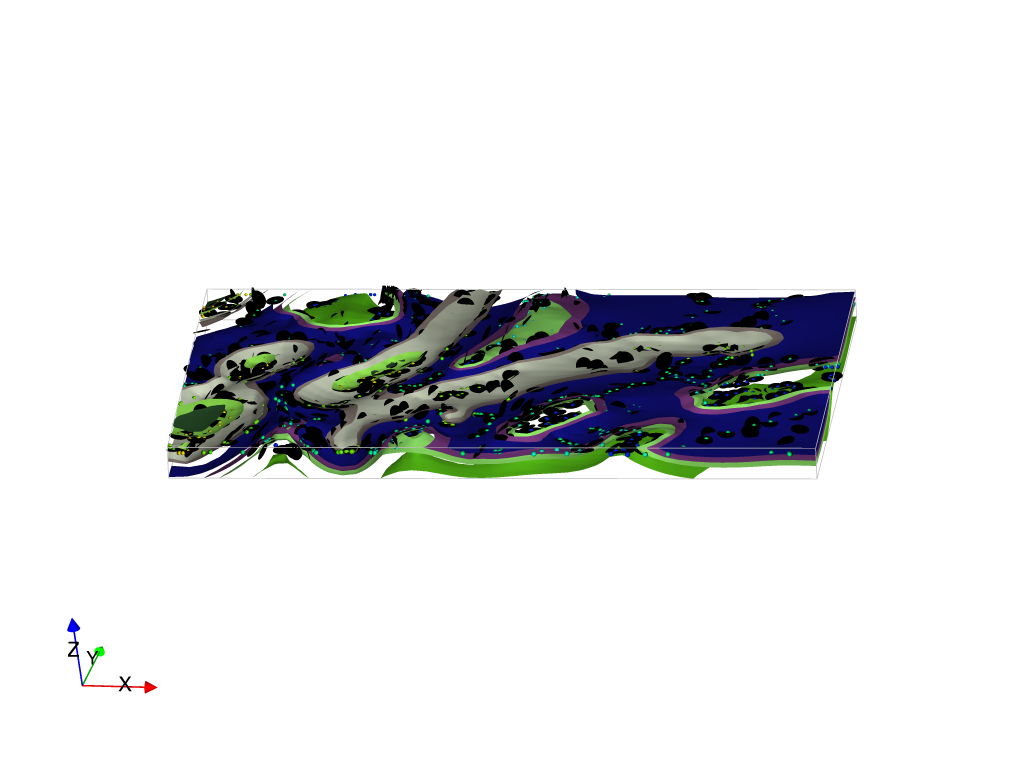

In [18]:
view.display()

In [12]:
basal_contacts = geopandas.read_file(proj.config.tmp_path+'basal_contacts.shp')
tangent = pd.read_csv(proj.config.tmp_path+'raw_contacts.csv')

In [14]:
basal_contacts

id                           STRATNAME  \
0    215                       Wilpena_Group   
1    214                      Callanna_Group   
2    213                      Callanna_Group   
3    212  Unnamed_GIS_Unit___see_description   
4    211                         Burra_Group   
5    210                         Burra_Group   
6    209                         Burra_Group   
7    208                         Burra_Group   
8    207                         Burra_Group   
9    206                       Wilpena_Group   
10   205                       Wilpena_Group   
11   204                       Wilpena_Group   
12   203                       Wilpena_Group   
13   202                Yudnamutana_Subgroup   
14   201                Yudnamutana_Subgroup   
15   200                Yudnamutana_Subgroup   
16   199                Yudnamutana_Subgroup   
17   198                Yudnamutana_Subgroup   
18   197                Yudnamutana_Subgroup   
19   196                Yudnamutana_Subgroup   
20   195                Yudnamutana_Subgroup   
21   194                   Yerelina_Subgroup   
22   193                    Umberatana_Group   
23   192                    Umberatana_Group   
24   191                   Yerelina_Subgroup   
25   190                   Yerelina_Subgroup   
26   189                   Yerelina_Subgroup   
27   188                   Yerelina_Subgroup   
28   187                    Umberatana_Group   
29   186                Yudnamutana_Subgroup   
30   185                    Umberatana_Group   
31   184                    Umberatana_Group   
32   183                Yudnamutana_Subgroup   
33   182                Yudnamutana_Subgroup   
34   181                Yudnamutana_Subgroup   
35   180                Yudnamutana_Subgroup   
36   179                    Umberatana_Group   
37   178                   Yerelina_Subgroup   
38   177                Yudnamutana_Subgroup   
39   176                Yudnamutana_Subgroup   
40   175                     Emeroo_Subgroup   
41   174                Yudnamutana_Subgroup   
42   173                Yudnamutana_Subgroup   
43   172                   Yerelina_Subgroup   
44   171                Yudnamutana_Subgroup   
45   170                Yudnamutana_Subgroup   
46   169                Yudnamutana_Subgroup   
47   168                   Yerelina_Subgroup   
48   167                   Yerelina_Subgroup   
49   166                       Wilpena_Group   
50   165                         Burra_Group   
51   164                    Umberatana_Group   
52   163                    Umberatana_Group   
53   162                    Umberatana_Group   
54   161                    Umberatana_Group   
55   160                    Umberatana_Group   
56   159                      Pound_Subgroup   
57   158                     Emeroo_Subgroup   
58   157                     Emeroo_Subgroup   
59   156                   Yerelina_Subgroup   
60   155                   Yerelina_Subgroup   
61   154                   Yerelina_Subgroup   
62   153                Yudnamutana_Subgroup   
63   152                Yudnamutana_Subgroup   
64   151                Yudnamutana_Subgroup   
65   150                Yudnamutana_Subgroup   
66   149                    Umberatana_Group   
67   148                    Umberatana_Group   
68   147                     Emeroo_Subgroup   
69   146                     Emeroo_Subgroup   
70   145                Yudnamutana_Subgroup   
71   144                    Umberatana_Group   
72   143                    Umberatana_Group   
73   142                    Umberatana_Group   
74   141                         Burra_Group   
75   140                         Burra_Group   
76   139                         Burra_Group   
77   138                       Wilpena_Group   
78   137                         Burra_Group   
79   136                Yudnamutana_Subgroup   
80   135                   Yerelina_Subgroup   
81   134                   Yerelina_Subgroup   
82   133              

In [16]:
for line in basal_contacts.geometry: # loop through line segments
    if line is None:
        continue
    print(type(line))

<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString'>
<class 'shapely.geometry.multilinestring.MultiLineString

In [17]:
import matplotlib.pyplot as plt
import shapely
lines = []
for line in basal_contacts.geometry: # loop through line segments
    if line is None:
        continue
    points = []
    if type(line) is shapely.geometry.linestring.LineString:
        points.append([line.coords[1][0],line.coords[1][1]])
        continue
    for subline in line:
        points.append([subline.coords[1][0],subline.coords[1][1]])
    
    lines.append(np.array(points))

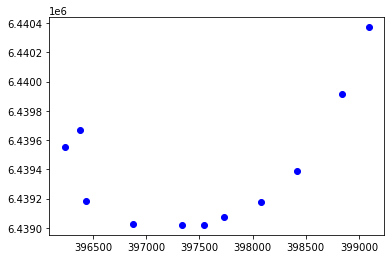

In [18]:
i = 12
plt.plot(lines[i][:,0],lines[i][:,1],'bo')
tangents = []
for l in lines:
    line_tangents = []
    for i in range(len(l)):
        if i+1 > len(l)-1:
            line_tangents.append([l[i-1,0]-l[i,0],l[i-1,1]-l[i,1]])
            continue
        line_tangents.append([l[i,0]-l[i+1,0],l[i,1]-l[i+1,1]])
    tangents.append(np.array(line_tangents))

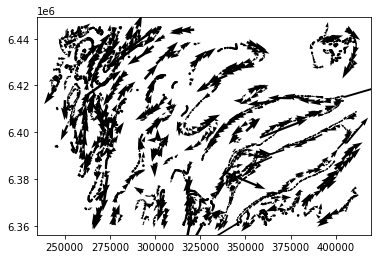

In [19]:
for i in range(len(lines)):
    plt.quiver(lines[i][:,0],lines[i][:,1],tangents[i][:,0],tangents[i][:,1],scale=100000)
    

In [20]:
derivatives = []
for i in range(len(tangents)):
    line_derivative = []
    for j in range(1,len(tangents[i])-1):
        dx = tangents[i][j-1,0]-tangents[i][j+1,0]
        dy = tangents[i][j-1,1]-tangents[i][j+1,1]
        dot = np.dot(tangents[i][j-1,:]/np.linalg.norm(tangents[i][j-1,:]),tangents[i][j+1,:]/np.linalg.norm(tangents[i][j+1,:]))
        line_derivative.append([dx,dy,lines[i][j,0],lines[i][j,1],dot])
    if len(line_derivative) > 0:
        derivatives.append(np.array(line_derivative))

In [21]:
dot = []
x = []
y = []
for d in derivatives:
    dot.extend(d[:,4].tolist())
    x.extend(d[:,2].tolist())
    y.extend(d[:,3].tolist())

In [23]:
# from LoopStructural.visualisation import MapView
# mapview = MapView(model)
# mapview.add_data(model['supergroup_0'],dip=False,val=False,symb_scale=1000)

In [26]:
from scipy.ndimage.filters import gaussian_filter

def myplot(x, y, s, model=None, bins=1000):
    crange = None
    if model:
        crange = [[model.origin[0],model.maximum[0]],
                  [model.origin[1],model.maximum[1]]]
    heatmap, xedges, yedges = np.histogram2d(x, y, range=crange, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

Text(0.5, 1.0, 'C. Key locality map')

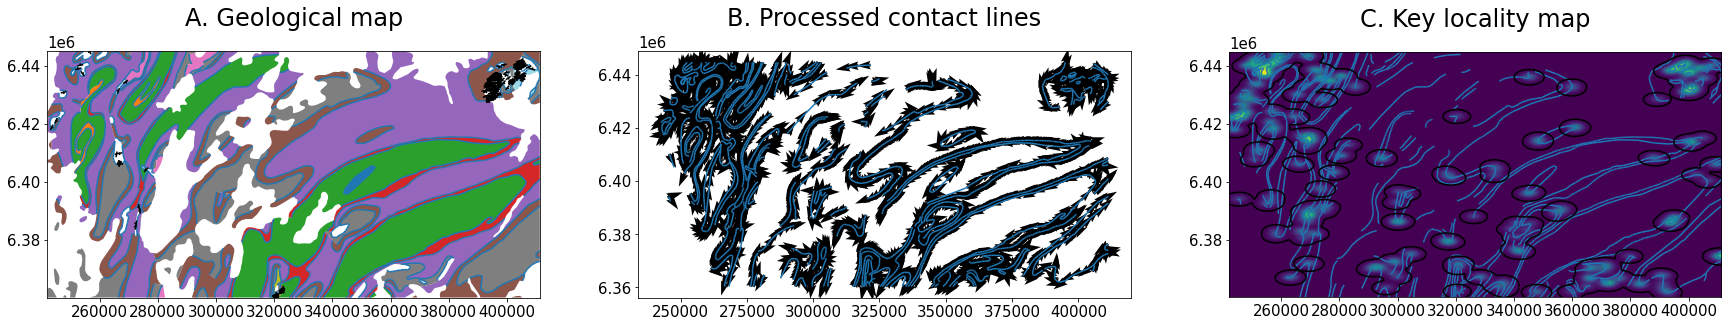

In [31]:
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size*1.2,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)


fig, ax = plt.subplots(1,3,figsize=(30,10))
key_localities = np.zeros((300,3))
key_localities[:,2] = 1.
ki = 0
for d in derivatives:
#     try:
#         ax[2].scatter(d[:,2],d[:,3],c=np.rad2deg(np.cos(np.abs(d[:,4]))),vmin=np.min(np.rad2deg(np.cos(np.abs(dot)))),vmax=np.max(np.rad2deg(np.cos(np.abs(dot)))),cmap='rainbow',s=40)
#     #     break
# #         ax[1].scatter(d[:,2],d[:,3],c=d[:,0])
#     except:
# #         print(d)
#         pass
    try:
        mask = np.rad2deg(np.cos(np.abs(d[:,4]))) > 45
#         ax[0].plot(d[mask,2],d[mask,3],'ro')#c=np.rad2deg(np.cos(np.abs(d[:,4]))),vmin=np.min(np.rad2deg(np.cos(np.abs(dot)))),vmax=np.max(np.rad2deg(np.cos(np.abs(dot)))),cmap='rainbow',s=40)
    #     break
#         ax[1].scatter(d[:,2],d[:,3],c=d[:,0])
        key_localities[ki:np.sum(mask)+ki,0] = d[mask,2]
        key_localities[ki:np.sum(mask)+ki,1] = d[mask,3]

        ki+=np.sum(mask)
    except:
#         print(d)
        pass
basal_contacts.plot(ax=ax[0])
basal_contacts.plot(ax=ax[2])

for i in range(len(lines)):
    temp_tangents = tangents[i][:,:2]/np.linalg.norm(tangents[i][:,:2],axis=1)[:,None]
    ax[1].quiver(lines[i][:,0],lines[i][:,1],temp_tangents[:,0],temp_tangents[:,1],scale=5,scale_units='inches')
basal_contacts.plot(ax=ax[1])
proj.config.geol_clip.plot('colour_index',ax=ax[0],cmap='tab20')
# proj.config.structure_clip.plot(ax=ax[0])
mapview = MapView(model,ax=ax[0])
mapview.add_data(model['supergroup_0'],dip=False,val=False,symb_scale=750)
heatmap, extent = myplot(key_localities[:ki,0],key_localities[:ki,1],10,model=model)
cax = ax[2].imshow(heatmap,origin='lower',extent=extent)#(model.origin[0],model.maximum[0],model.origin[1],model.maximum[1]))
ax[2].contour(heatmap,levels=[0.00003],colors='black',origin='lower',extent=extent)#(model.origin[0],model.maximum[0],model.origin[1],model.maximum[1]))
# plt.colorbar(cax)
# basal_contacts.plot(ax=plt.gca())
ax[0].set_title('A. Geological map')
ax[1].set_title('B. Processed contact lines')
ax[2].set_title('C. Key locality map')

<AxesSubplot:>

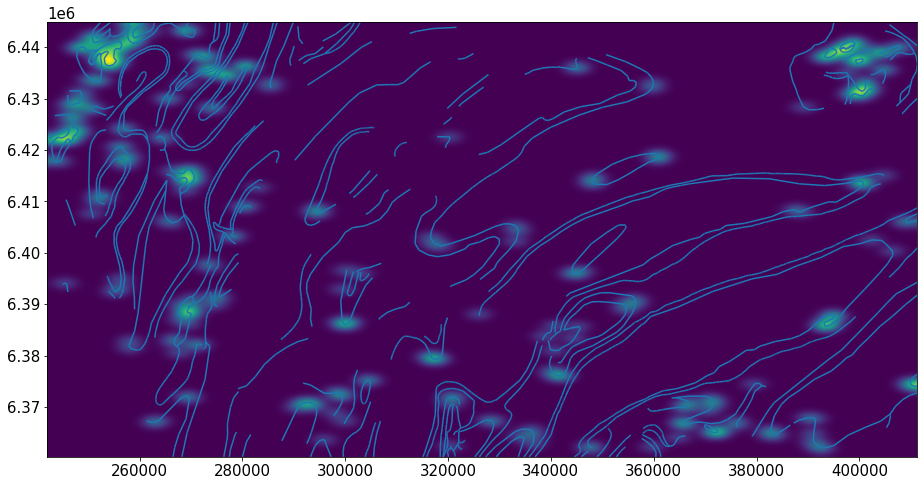

In [30]:
plt.imshow(heatmap,origin='lower',extent=extent)
basal_contacts.plot(ax=plt.gca())

In [ ]:
proj.config.structure_clip.plot()

In [ ]:
plt.plot(key_localities[:ki,0],key_localities[:ki,1],'bo')

In [ ]:
plt.hist(np.rad2deg(np.arccos(np.abs(dot))))

In [ ]:
key_localities[:ki,0]

In [ ]:
extent

In [ ]:
# heatmap[np.isclose(heatmap,0)] = np.nan

In [ ]:
plt.imshow(heatmap,origin='lower',extent=extent)#(model.origin[0],model.maximum[0],model.origin[1],model.maximum[1]))
basal_contacts.plot(ax=plt.gca())
# plt.scatter(key_localities[:ki,0],key_localities[:ki,1])

In [ ]:
yedges

In [ ]:
from scipy.interpolate import rbf

In [ ]:
rbfi = rbf.Rbf(key_localities[:,0],key_localities[:,1],key_localities[:,2])

In [176]:
xi = np.linspace(270000,350000,100)
yi = np.linspace(6.375e6,6.420e6,100)
xx,yy = np.meshgrid(xi,yi)
zz = np.zeros(xx.shape)

In [177]:
v = rbfi(xx,yy,zz)

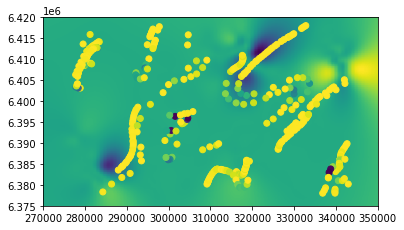

In [180]:
plt.imshow(v,extent=(270000,350000,6.375e6,6.420e6))
# basal_contacts.plot(ax=plt.gca())
plt.scatter(x,y,c=dot)

<AxesSubplot:>

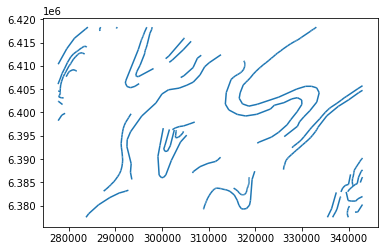

In [124]:
basal_contacts.plot()

In [ ]:
if(not line.coords[0][0]==line.coords[1][0] or not line.coords[0][1]==line.coords[1][1]):               
                lsx=dlsx/sqrt((dlsx*dlsx)+(dlsy*dlsy))
                lsy=dlsy/sqrt((dlsx*dlsx)+(dlsy*dlsy))
                x[i]=line.coords[1][0]+(dlsx/2)
                y[i]=line.coords[1][1]+(dlsy/2)
                angle=degrees(atan2(lsx,lsy))
                l[i]=lsx
                m[i]=lsy
                locations=[(x[i],y[i])] #doesn't like point right on edge?
                height=m2l_utils.value_from_dtm_dtb(dtm,dtb,dtb_null,cover_map,locations)
                if(str(acontact[c_l['g']])=='None'):
                    ostr=str(x[i])+","+str(y[i])+","+str(height)+","+str(angle%180)+","+str(lsx)+","+str(lsy)+","+acontact[c_l['c']].replace(" ","_").replace("-","_")+","+acontact[c_l['c']].replace(" ","_").replace("-","_")+"\n"
                else:
                    ostr=str(x[i])+","+str(y[i])+","+str(height)+","+str(angle%180)+","+str(lsx)+","+str(lsy)+","+acontact[c_l['c']].replace(" ","_").replace("-","_")+","+acontact[c_l['g']].replace(" ","_").replace("-","_")+"\n"
                f.write(ostr)
                npts=npts+1
        i=i+1

In [40]:
for i in range(10):
    basal_contacts.geometry[i].geoms[0]

<AxesSubplot:>

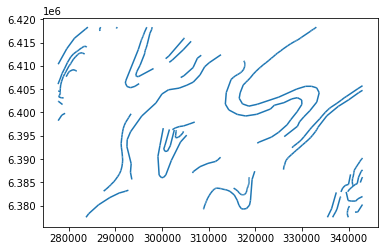

In [22]:
basal_contacts.plot()

In [651]:
from LoopStructural.visualisation import MapView
from map2loop.map import MapUtil

In [652]:
extent=[model.bounding_box[0,0], model.bounding_box[1,0], model.bounding_box[0,1], model.bounding_box[1,1]]

In [653]:
maps =proj.config.geol_clip#geopandas.read_file(proj.config.tmp_path+'geol_clip.shp')
masp = maps[maps['STRATNAM_1']!='Unnamed GIS Unit - see description']

Fetching DTM...  bbox:138.2487471414877 139.37108898881752 -32.579487181629595 -31.883661960489242
Attempt: 0 dtm geotif saved as ./interactive_model-test2/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./interactive_model-test2/dtm/dtm_rp.tif


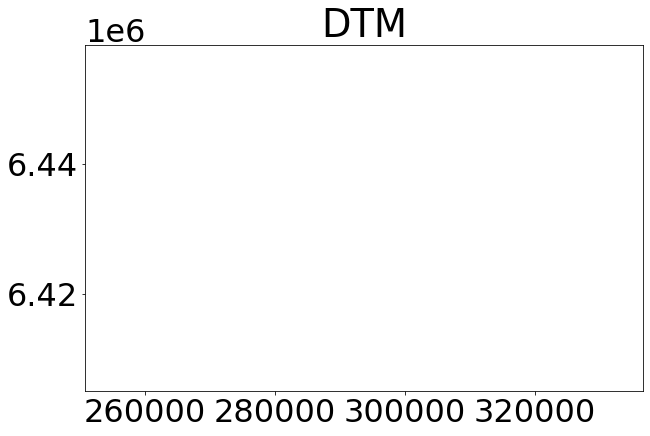

In [654]:
mapview = MapView(model)
proj.config.load_dtm()
geomap = MapUtil(proj.config.bbox_3d,maps,proj.config.dtm)
mapview.nsteps = (200,200)
xy = np.array([mapview.xx
               .flatten(),mapview.yy.flatten()]).T
dtm = geomap.evaluate_dtm_at_points(xy)


In [655]:
geo_map = geomap.evaluate_geology_at_points(xy)
# dtm[:]=0
model_map = model.evaluate_model(np.vstack([xy.T,dtm]).T)

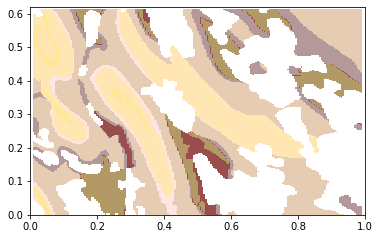

In [656]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(geo_map.reshape(mapview.nsteps).T,cmap=proj.config.cmap,extent=extent)

In [657]:
diff = geo_map-model_map
diff[diff==0]= np.nan

In [658]:
b = []
# b.append(0)
for v in m2l_data['strat_va']:
    b.append(v)


In [659]:
data = []
colours = []
boundaries = []
for u, v in m2l_data['stratigraphic_column']['supergroup_0'].items():
    data.append((m2l_data['strat_va'][u],v['colour']))
    colours.append(v['colour'])
    boundaries.append(m2l_data['strat_va'][u])    

In [660]:
from matplotlib import colors
cmap = colors.ListedColormap(colours)
cmap = colors.ListedColormap(cmap.colors[::-1])
b = np.array(boundaries)
print()
b = b[::-1]
boundaries = colors.BoundaryNorm(b,ncolors=len(colours))

In [661]:
# mapview = MapView(model)
# mapview.add_data(model.features[-1],grad=False,cmap=cmap)
# mapview.add_scalar_field(model.features[-1],cmap=cmap,norm=boundaries)


In [662]:
val_data = model.features[-1].interpolator.get_value_constraints()[:,:4]
val_data = np.copy(val_data)
model.rescale(val_data[:,:3],inplace=True)

array([[3.01573836e+05, 6.41075103e+06, 3.38000000e+02],
       [3.02226701e+05, 6.41124053e+06, 3.32000000e+02],
       [3.04565833e+05, 6.41343778e+06, 3.14000000e+02],
       ...,
       [2.95462513e+05, 6.45568922e+06, 4.99222400e+02],
       [2.95329096e+05, 6.45731246e+06, 4.92000000e+02],
       [2.95306859e+05, 6.45749035e+06, 4.78000000e+02]])

Text(0.5, 1.0, 'C. Interpolated geological map')

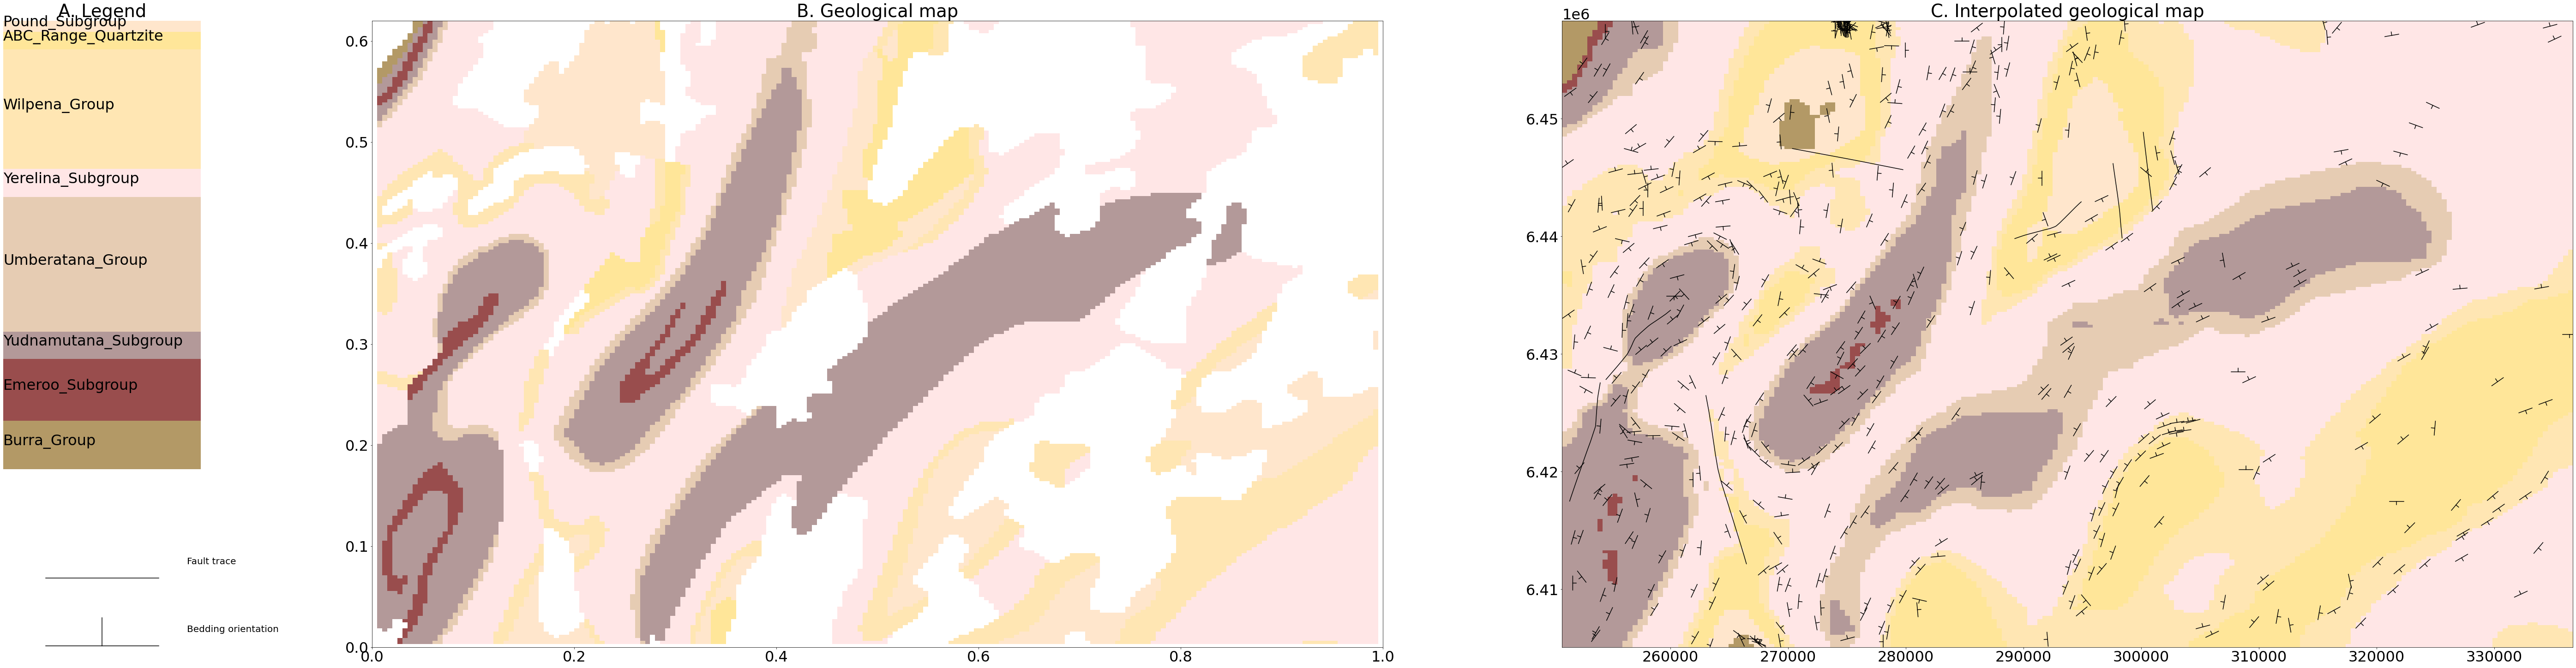

In [663]:
plt.rcParams.update({'font.size': 32})
fig3 = plt.figure(constrained_layout=True,figsize=(80,20))
nx = 6
gs = fig3.add_gridspec(5, 2*nx+1)
legend = fig3.add_subplot(gs[:-1, :1])
strike = fig3.add_subplot(gs[-1:,:1])

#add stike symbol
gradient_data = np.array([[0,1.,0]])
t = gradient_data[:, [1, 0]] * np.array([1, -1]).T
n = gradient_data[:, 0:2]
# t *= symb_scale
n *= 0.5
p1 = gradient_data[:, [0, 1]] - t
p2 = gradient_data[:, [0, 1]] + t
# plt.scatter(val[:,0],val[:,1],c='black')
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1], p2[:, 1]], 'black')
p1 = gradient_data[:, [0, 1]]
p2 = gradient_data[:, [0, 1]] + n
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1], p2[:, 1]], 'black')
strike.annotate("Bedding orientation", xy=[0,0],xytext=[1.5,.75],annotation_clip=False,size=20)
strike.set_xlim(-2,2)
# strike.plot()
strike.axis('off')
strike.axis('square')
p1 = gradient_data[:, [0, 1]] - t
p2 = gradient_data[:, [0, 1]] + t
strike.plot([p1[:, 0], p2[:, 0]], [p1[:, 1]+1.2, p2[:, 1]+1.2], 'black')
strike.annotate("Fault trace", xy=[0,1.2],xytext=[1.5,.75+1.2],annotation_clip=False,size=20)

# f3_ax1.set_title('gs[0, :-2]')
geol_map_ax = fig3.add_subplot(gs[:, 1:nx+1])
model_map_ax = fig3.add_subplot(gs[:, nx+1:])

column_ax = StratigraphiColumnView(model,legend)
geol_map_ax.imshow(geo_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)
# proj.config.faults_clip.plot(ax=geol_map_ax)
mapview2 = MapView(model,ax=model_map_ax)
mapview2.nsteps=(200,200)
mapview2.add_data(model.features[-1],dip=False,val=False,symb_scale=600)
mapview2.add_model(cmap=cmap,z=dtm)
mapview2.add_faults(colors='black')
model_map_ax.imshow(model_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)

legend.set_title('A. Legend')
geol_map_ax.set_title('B. Geological map')
model_map_ax.set_title('C. Interpolated geological map')

In [664]:
# fig, ax = plt.subplots(1,3,figsize=(100,40))
# mapview = MapView(model,ax=ax[1])
ax[0].imshow(model_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)
ax[1].imshow(geo_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)
ax[2].imshow(diff.reshape(mapview.nsteps).T,extent=extent,origin='lower')
# mapview.add_data(model.features[-1],grad=False,cmap=cmap)
# ax[0].set_title('A. )

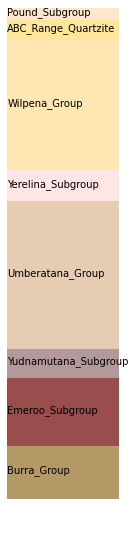

In [549]:
strat = StratigraphiColumnView(model)

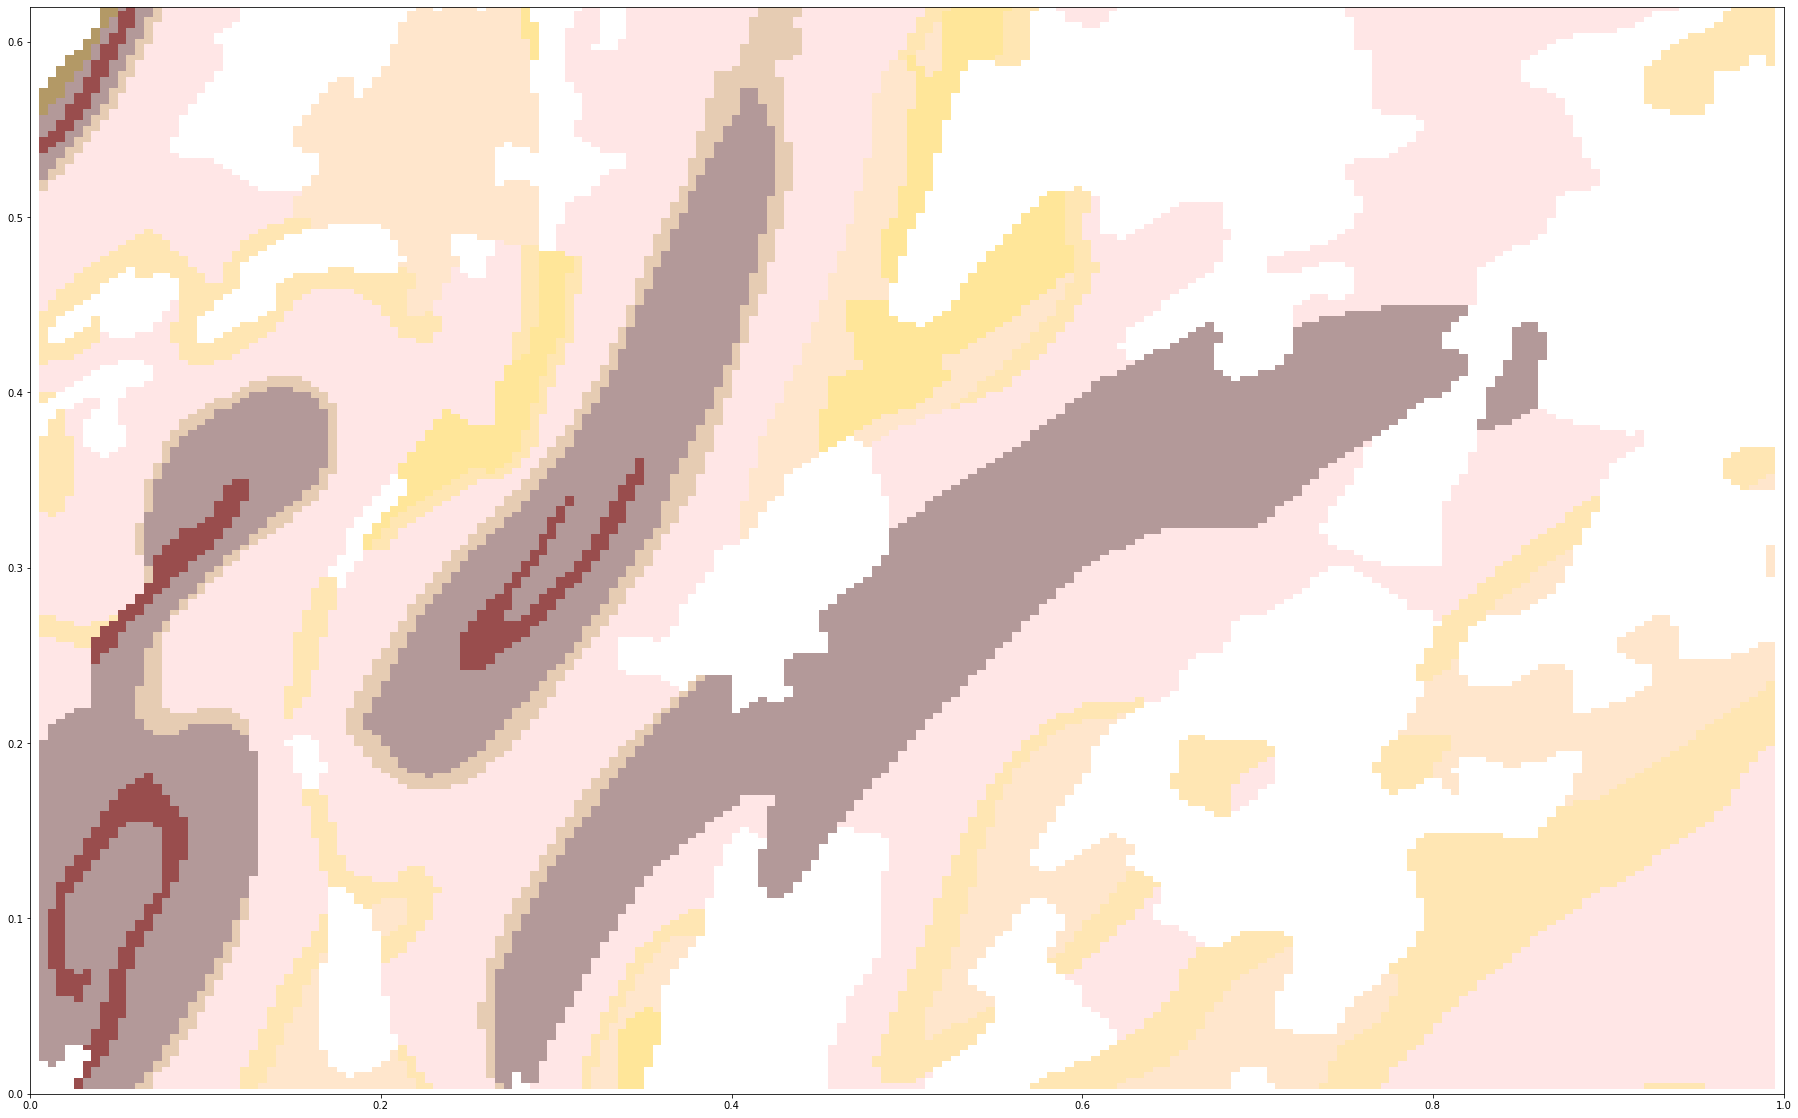

In [550]:
plt.figure(figsize=(40,20))
plt.imshow(geo_map.reshape(mapview.nsteps).T,extent=extent,cmap=cmap,origin='lower',vmin=0,vmax=7)

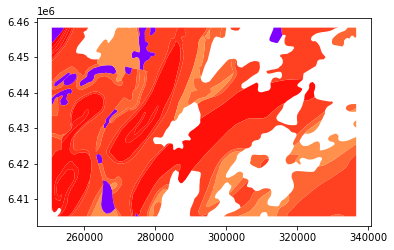

In [551]:
maps = geopandas.read_file(proj.config.tmp_path+'geol_clip.shp')
ax = maps.plot('ave',cmap='rainbow_r')
# plt.colorbar(ax)

In [552]:
model.stratigraphic_column['supergroup_0'].keys()

dict_keys(['Pound_Subgroup', 'ABC_Range_Quartzite', 'Wilpena_Group', 'Yerelina_Subgroup', 'Umberatana_Group', 'Yudnamutana_Subgroup', 'Emeroo_Subgroup', 'Burra_Group'])

ValueError: could not convert string to float: 

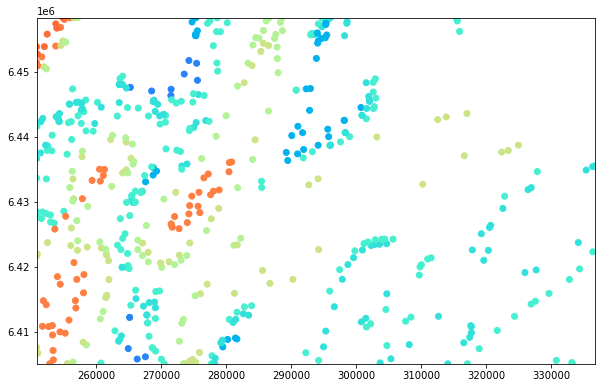

In [553]:
mapview2 = MapView(model)
mapview2.nsteps = (200,200)
mapview2.add_data(model.features[-1],grad=False)
mapview2.add_model('')#(model_map.reshape(mapview.nsteps).T,extent=extent,cmap='tab20',origin='lower',vmin=0,vmax=7)


In [ ]:
np.unique(geo_map[~np.isnan(geo_map)].flatten())

In [ ]:
contact_loc = m2l_data['data'][['X','Y','Z','formation','val','gx']]

In [ ]:
contact_loc = contact_loc[~np.isnan(contact_loc['val'])]
contact_loc['id'] = np.nan
for u in model.stratigraphic_column['supergroup_0'].keys():
    contact_loc.loc[contact_loc['formation']==u,'id'] = model.stratigraphic_column['supergroup_0'][u]['id']
#     if model.stratigraphic_column['supergroup_0'][u]['id'] == val:

In [ ]:
contact_obs = contact_loc[['X','Y','id']].to_numpy()
plt.scatter(contact_obs[:,0],contact_obs[:,1],c=contact_obs[:,2],cmap='tab20',s=5)

In [ ]:
mview = MapView(model)
mview.nsteps=(200,200)
mview.add_model()#,vmin=0,vmax=10)

In [ ]:
extent = (model.origin[0],model.maximum[0],model.origin[1],model.maximum[1])

In [ ]:
name

In [ ]:
proj.config.geol_clip

In [ ]:
fig, ax = plt.subplots(8,3,figsize=(20,5*8))
lines = geopandas.read_file(proj.config.tmp_path+'basal_contacts.shp')
geol = geopandas.read_file(proj.config.tmp_path+'geol_clip.shp')#proj.config.geol_clip
for val in range(8):
#     val = 1
    name = None
    for u in model.stratigraphic_column['supergroup_0'].keys():
        if model.stratigraphic_column['supergroup_0'][u]['id'] == val:
            name =  u
#         if name == None:
#             for u in model.stratigraphic_column['supergroup_1'].keys():
#                 if model.stratigraphic_column['supergroup_1'][u]['id'] == val:
#                     name =  u
    if name == None:
        continue
    val_data = contact_loc.loc[contact_loc['formation']==name,['X','Y','val']].to_numpy()
    geo_map_0 = np.zeros(geo_map.shape)
    geo_map_0[:] = np.nan
    geo_map_0[geo_map==val] = 0
    ax[val][0].imshow(geo_map_0.reshape(mapview.nsteps).T,origin='lower',extent=extent)
    model_map_0 = np.zeros(model_map.shape)
    model_map_0[:] = np.nan
    model_map_0[model_map==val] = 0
    ax[val][1].imshow(model_map_0.reshape(mapview.nsteps).T,origin='lower',extent=extent)
    geol[geol['STRATNAME']==name.replace('_',' ')].plot(ax=ax[val][1],facecolor='none',edgecolor='black')
    # mask = val_data[:,3] == val
    ax[val][1].scatter(val_data[:,0],val_data[:,1],s=5,c='r')
    ax[val][0].scatter(val_data[:,0],val_data[:,1],s=5,c='r')
    lines[lines['STRATNAME']==name].plot(ax=ax[val][2])
    for i in range(3):
        ax[val][i].set_xlim(extent[0],extent[1])
        ax[val][i].set_ylim(extent[2],extent[3])
    ax[val][0].set_title('Geological map {}'.format(name))
    ax[val][1].set_title('Model map pattern {}'.format(name))
    ax[val][2].set_title('Basal contacts {}'.format(name))

plt.tight_layout()

In [ ]:
lines = geopandas.read_file(proj.config.tmp_path+'basal_contacts.shp')
# lines[lines['STRATNAME']==name].plot()
plt.scatter(val_data[:,0],val_data[:,1])

In [ ]:
points_raw = pd.read_csv(proj.config.output_path+'contacts_clean.csv')

In [ ]:
location_data = points_raw.loc[points_raw['formation']==name,['X','Y']].to_numpy()

In [ ]:
plt.scatter(location_data[:,0],location_data[:,1])

NameError: name 'faults_clip' is not defined

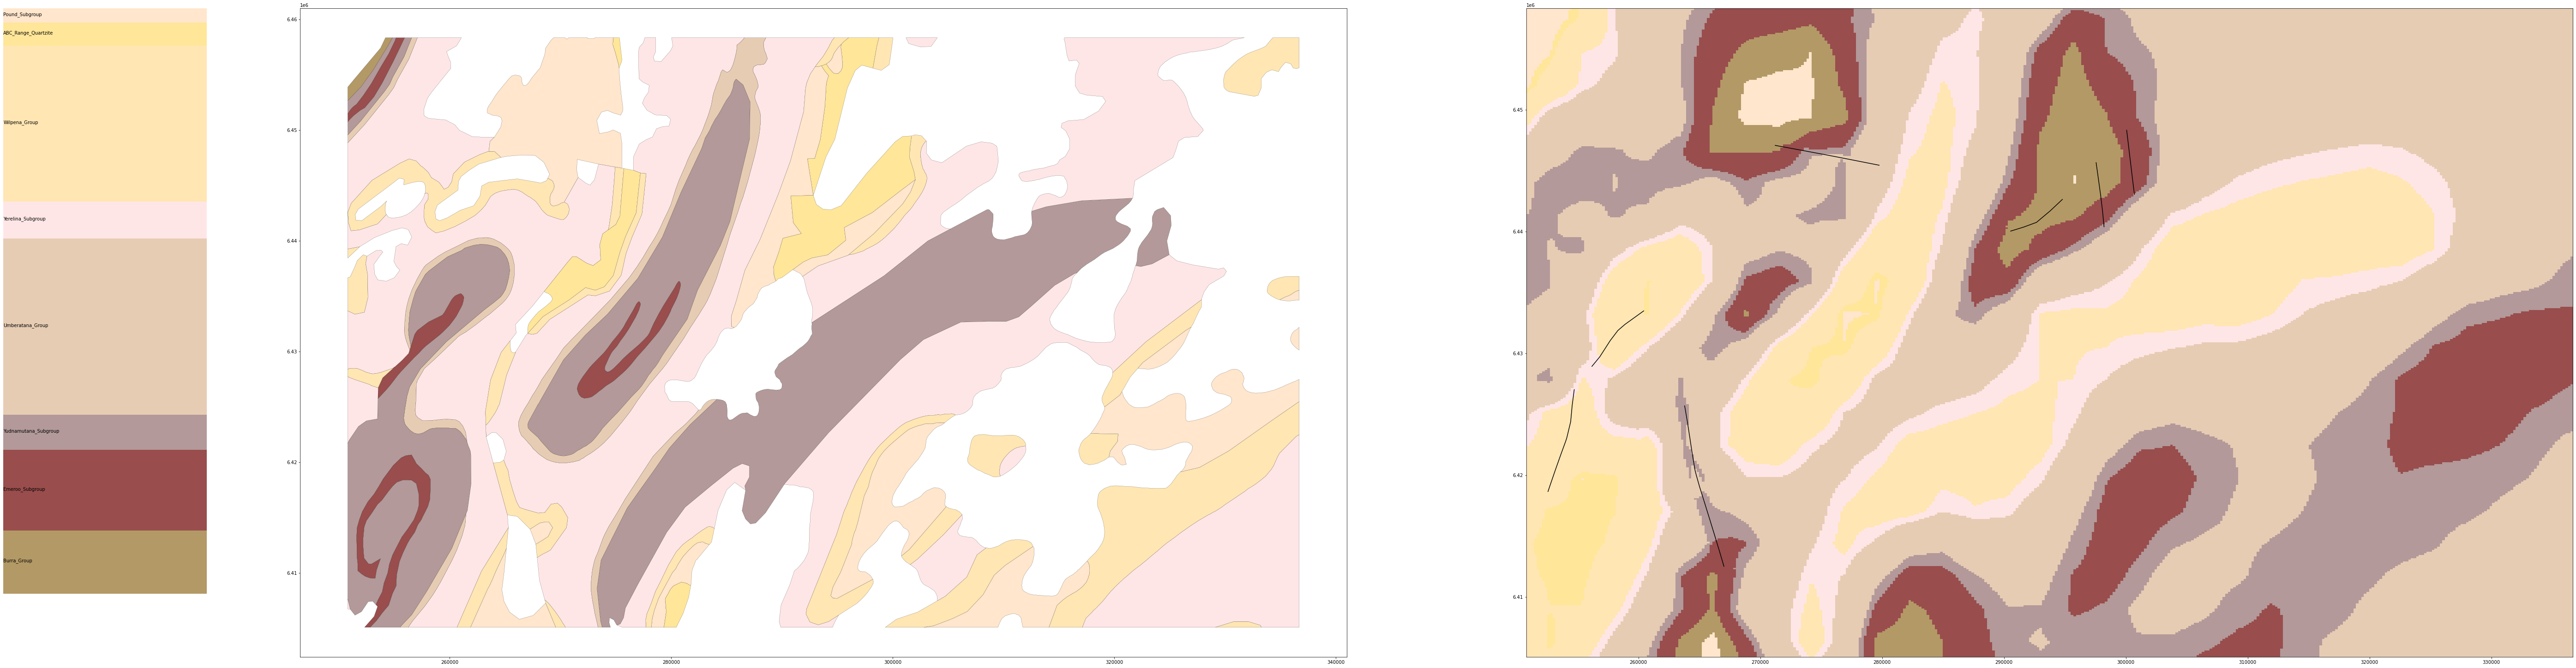

In [533]:
import matplotlib.colors as colors
from LoopStructural import MapView
fig3 = plt.figure(constrained_layout=True,figsize=(80,20))
nx = 6
gs = fig3.add_gridspec(3, 2*nx+1)
legend = fig3.add_subplot(gs[:, :1])
# f3_ax1.set_title('gs[0, :-2]')
geol_map = fig3.add_subplot(gs[:, 1:nx+1])
model_map = fig3.add_subplot(gs[:, nx+1:])
column = StratigraphiColumnView(model,legend)

# fig, ax = plt.subplots(1,2,figsize=(20,10))
# colours = [] #container for the discrete colours we are using
# # random_colours = np.random.random((len(geology_ll['STRATNAME'].unique()),3)) #random colours
# asc=pd.read_csv(tmp_path+'all_sorts_clean.csv',",")
# #display(asc)
# colours=pd.read_csv(clut_path,",")
# if( c_l['c']=='CODE'):
#     code=c_l['c'].lower()
# else:
#     code=c_l['c']

# colours = [] #container for the discrete colours we are using
# i=0
# geol_clip['colour_index'] = np.nan #initialise a colour index attribute column
# for ind,strat in asc.iterrows():
#     geol_clip[c_l['c']].str.replace(" ","_")
#     geol_clip.loc[geol_clip[c_l['c']]==strat['code'].replace("_"," "),'colour_index'] = i
#     colours.append(strat['colour'])
#     i=i+1
    
# #     cmap = colors.ListedColormap(colours)
# cmap = colors.ListedColormap(colours) # create a cmap for passing to geopandas
base=proj.config.geol_clip.plot(column='colour_index',figsize=(10,10),edgecolor='#000000',linewidth=0.2,cmap=cmap,ax=geol_map)
mapview = MapView(model,ax=model_map)
mapview.add_faults(colors='black')
mapview.nsteps = (400,400)
mapview.add_model(z=600)
faults_clip.plot(color='black',ax=geol_map)
geol_all = gpd.read_file('../SA/data/2M_Surface_Geology_28354_relage.shp').to_crs(dst_crs)
geol_all[geol_all['MAPSYMB']=='Qpa'].plot(facecolor='None',edgecolor='red',linewidth=0.5,ax=geol_map)
geol_map.set_ylim(geology_ll.total_bounds[1],geology_ll.total_bounds[3])
geol_map.set_xlim(geology_ll.total_bounds[0],geology_ll.total_bounds[2],)
                                           
geol_all[geol_all['MAPSYMB']=='Qpa'].plot(facecolor='None',edgecolor='red',linewidth=0.5,ax=model_map)
model_map.set_ylim(geology_ll.total_bounds[1],geology_ll.total_bounds[3])
model_map.set_xlim(geology_ll.total_bounds[0],geology_ll.total_bounds[2],)
legend.set_title('A. Stratigraphic column')
geol_map.set_title('B. Geological map')
model_map.set_title('C. Interpolated geological map')
mapview2  = MapView(model,ax=geol_map)
mapview2.add_data(model.get_feature_by_name('supergroup_0'),val=False,dip=False,symb_scale=500)